In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook') 

In [4]:
# read in the data
data = pd.read_csv('/Users/carolchen/Desktop/Final_Data.csv')
data.columns

Index(['Age', 'ROM_FF', 'ROM_Abd', 'ROM_ER', 'ROM_IR', 'S_IR', 'S_ER', 'S_SS',
       'S_LO', 'S_Add', 'ROM_FF.1', 'ROM_Abd.1', 'ROM_ER.1', 'ROM_IR.1',
       'S_IR.1', 'S_ER.1', 'S_SS.1', 'S_LO.1', 'S_Add.1', 'Delta_Sport',
       'Delta_Overall', 'Type', 'Gender.M.1.', 'Shoulder.R.1.',
       'Insurance.Type.Public..0.', 'Work.relate', 'PainFre_Activity',
       'PainFre_Sleep', 'PainFre_Extreme', 'PainLev_Rest', 'PainLev_Overhead',
       'PainLev_Sleep', 'Stiffness', 'Difficulty_.Back', 'Difficulty_Overhead',
       'Overall', 'Current.Work', 'Current.Sport', 'PainFre_Activity.1',
       'PainFre_Sleep.1', 'PainFre_Extreme.1', 'PainLev_Rest.1',
       'PainLev_Overhead.1', 'PainLev_Sleep.1', 'Stiffness.1',
       'Difficulty_.Back.1', 'Difficulty_Overhead.1', 'Overall..1',
       'Current.Work.1', 'Current.Sport.1'],
      dtype='object')

In [5]:
# variable index
numv_index=['Age']
catv_index=['Gender.M.1.', 'Shoulder.R.1.', 'Insurance.Type.Public..0.','Work.relate']
preOp_numv_index=['ROM_FF', 'ROM_Abd', 'ROM_ER', 'ROM_IR', 'S_IR', 'S_ER', 'S_SS', 'S_LO', 'S_Add']
sixMon_numv_index=['ROM_FF.1', 'ROM_Abd.1', 'ROM_ER.1', 'ROM_IR.1', 'S_IR.1', 'S_ER.1', 'S_SS.1', 'S_LO.1', 'S_Add.1']
pre_Op_catv_index=['PainFre_Activity', 'PainFre_Sleep', 'PainFre_Extreme', 'PainLev_Rest', 'PainLev_Overhead', 
'PainLev_Sleep', 'Stiffness', 'Difficulty_.Back', 'Difficulty_Overhead', 'Overall', 'Current.Work', 'Current.Sport']
sixMon_catv_index=['PainFre_Activity.1', 'PainFre_Sleep.1', 'PainFre_Extreme.1', 'PainLev_Rest.1', 'PainLev_Overhead.1', 'PainLev_Sleep.1', 'Stiffness.1', 'Difficulty_.Back.1', 'Difficulty_Overhead.1', 'Overall..1', 'Current.Work.1',
       'Current.Sport.1']
y_index=['Delta_Sport', 'Delta_Overall']

### Descriptive Analysis of Numerical Variables 

In [7]:
# convert the variables to numerical values 
for var in numv_index+preOp_numv_index+sixMon_numv_index:
    data[var]=pd.to_numeric(data[var], downcast='float',errors='coerce')
# descriptive statistics of the normalized data set
with pd.option_context('display.max_rows', None, 'display.max_columns', 23):
    print(data[numv_index+preOp_numv_index+sixMon_numv_index+y_index].describe() )

              Age      ROM_FF     ROM_Abd      ROM_ER      ROM_IR        S_IR  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.502790    0.784802    0.663101    0.480351    0.555898    0.337802   
std      0.191657    0.207986    0.234894    0.224808    0.325980    0.183010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.611111    0.500000    0.300000    0.333333    0.206683   
50%      0.520000    0.861111    0.611111    0.500000    0.600000    0.309406   
75%      0.626667    0.944444    0.888889    0.700000    0.800000    0.450495   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             S_ER        S_SS        S_LO       S_Add    ROM_FF.1   ROM_Abd.1  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.346111    0.231061    0.180086    0.017660    0.789024    0.673313   
std      0.195694    0.1689

In [8]:
# subset the data set according to surgery group 
surgery_group=dict()
for group in data.groupby(data['Type']):
    (s, df) = group
    surgery_group[s] = df
surgery_types=list(surgery_group.keys())
surgery_types

['Acromioplasty',
 'Acromioplasty + Rotator cuff repair',
 'Bankart repair',
 'Calcific debridement',
 'Capsular release',
 'Hemiarthroplasty',
 'PTFE patch repair',
 'Reverse total shoulder arthroplasty',
 'Rotator cuff repair',
 'Rotator cuff repair + Capsular release',
 'Rotator cuff repair + Stabilisation',
 'Superior labral anterior posterior repair',
 'Total shoulder arthroplasty']

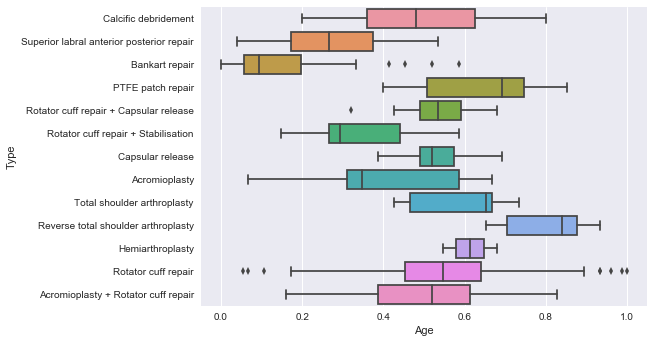

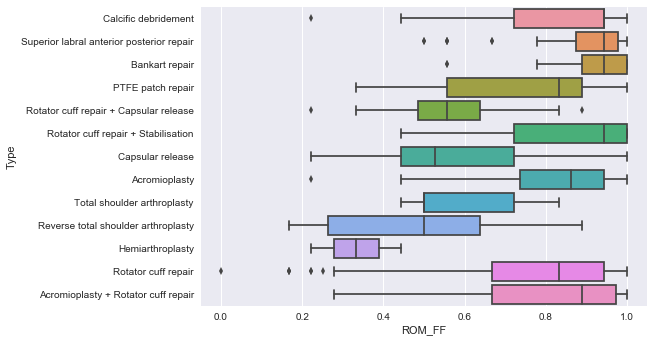

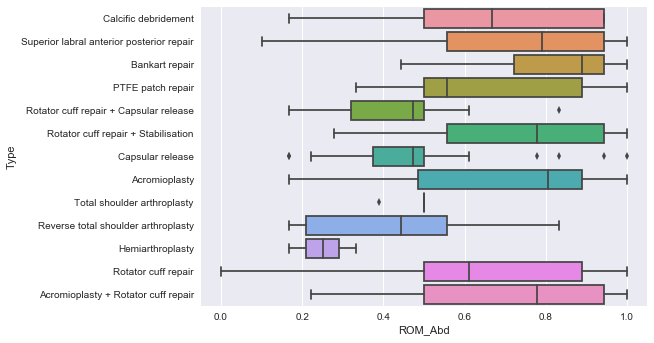

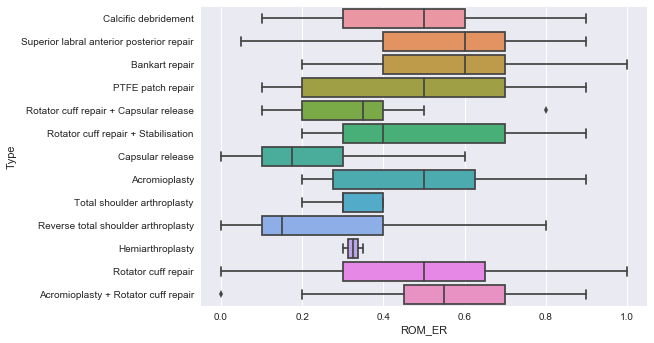

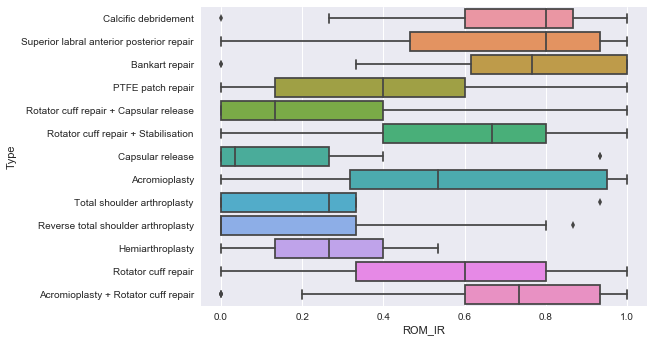

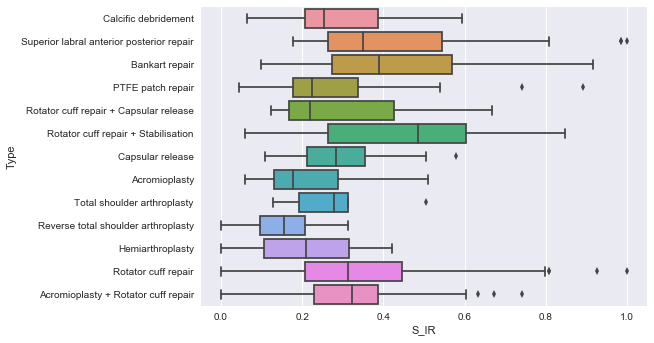

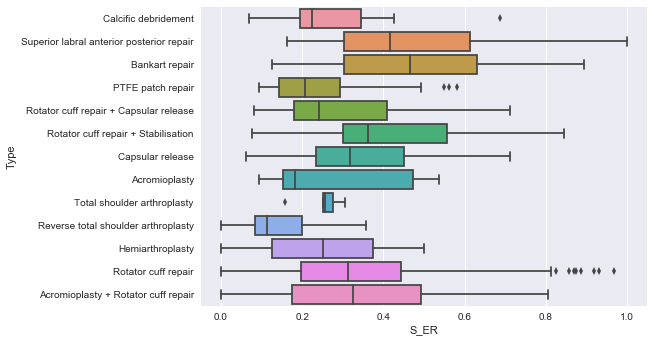

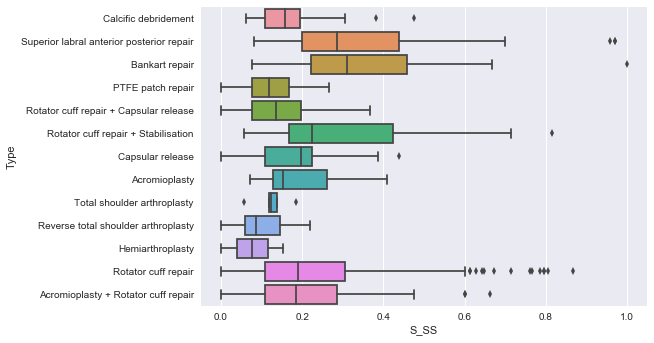

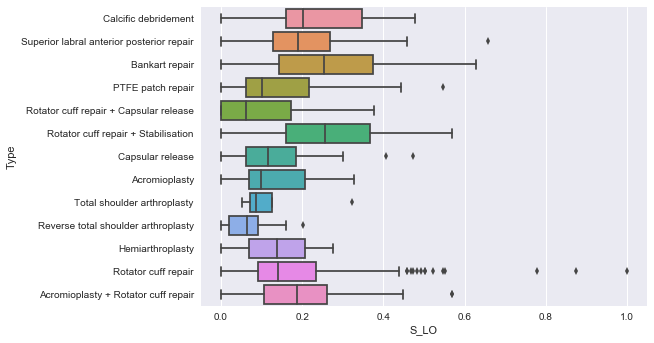

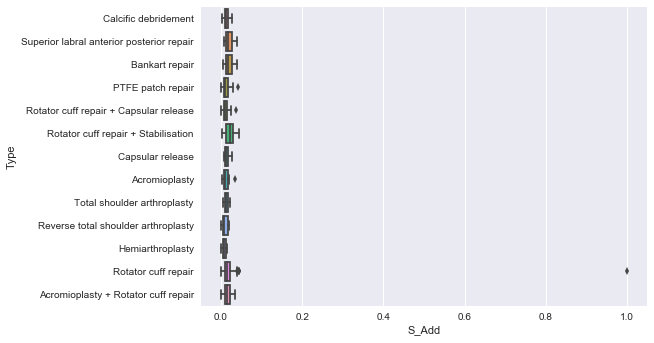

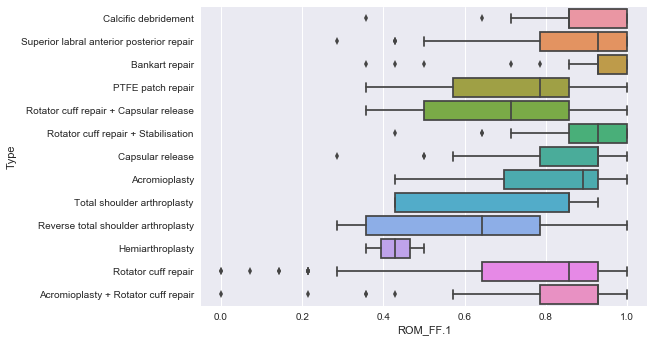

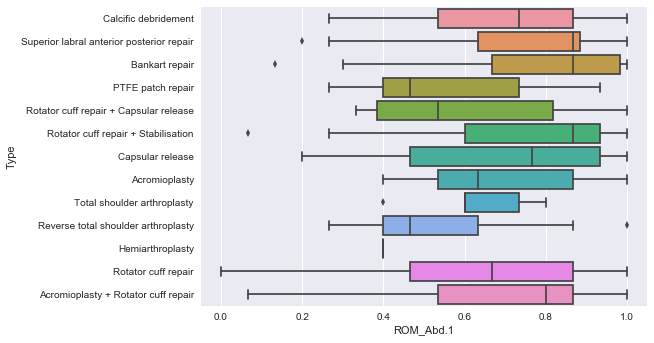

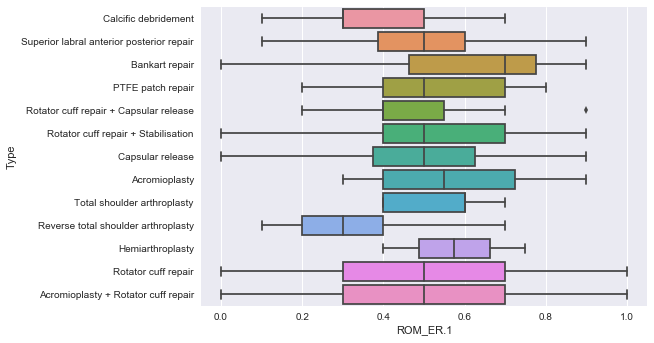

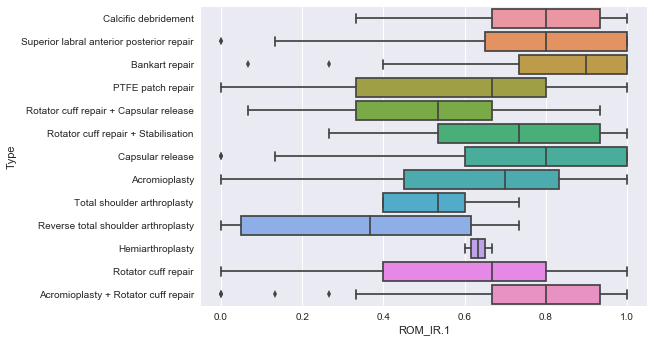

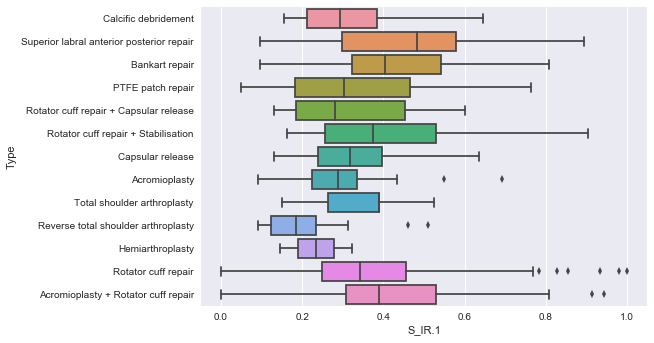

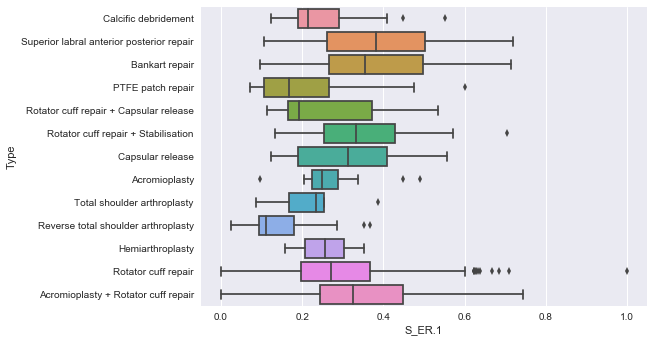

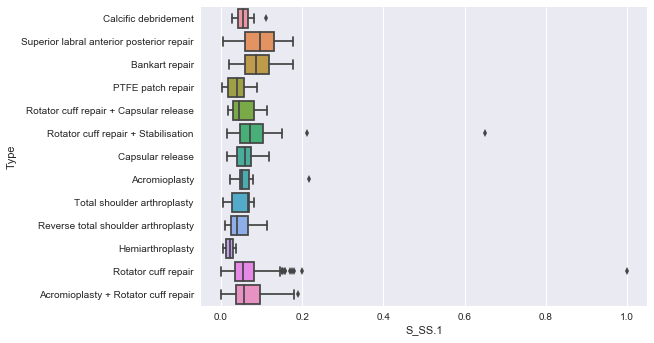

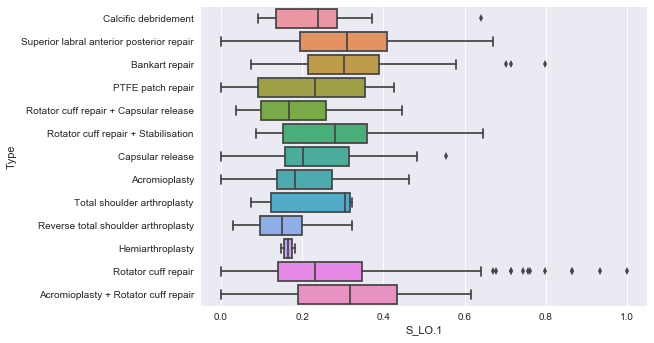

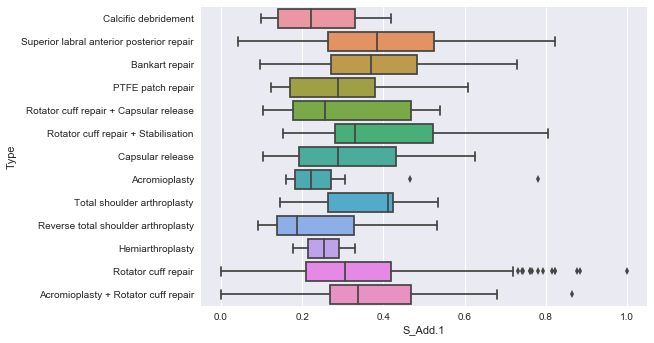

In [13]:
# compare numerical variables of different types with boxplots
def compare_num_boxplot(target_vars):
    for tv in target_vars:
        sns.boxplot(y="Type", x=tv, data=data, orient='h')
        sns.plt.show()        
compare_num_boxplot(numv_index+preOp_numv_index+sixMon_numv_index)   
# lots of outliners detected

In [117]:
#read in the orginal(non-normalization/cleaning) data set
origin_data=pd.read_excel('Final_Data.xlsx')
origin_data.columns

Index(['Type', 'Gender(M=1)', 'Age', 'Shoulder(R=1)',
       'Insurance Type(Public =0)', 'Work relate', ' PainFre_Activity',
       ' PainFre_Sleep', ' PainFre_Extreme', 'PainLev_Rest',
       'PainLev_Overhead', 'PainLev_Sleep', 'Stiffness', 'Difficulty_ Back',
       'Difficulty_Overhead', 'Overall ', 'Current Work', 'Current Sport',
       'ROM_FF', 'ROM_Abd', 'ROM_ER', 'ROM_IR', 'S_IR', 'S_ER', 'S_SS', 'S_LO',
       'S_Add', ' PainFre_Activity.1', ' PainFre_Sleep.1',
       ' PainFre_Extreme.1', 'PainLev_Rest.1', 'PainLev_Overhead.1',
       'PainLev_Sleep.1', 'Stiffness.1', 'Difficulty_ Back.1',
       'Difficulty_Overhead.1', 'Overall .1', 'Current Work.1',
       'Current Sport.1', 'ROM_FF.1', 'ROM_Abd.1', 'ROM_ER.1', 'ROM_IR.1',
       'S_IR.1', 'S_ER.1', 'S_SS.1', 'S_LO.1', 'S_Add.1', 'Delta_Sport',
       'Delta_Overall'],
      dtype='object')

In [60]:
# subset the data set according to surgery group 
origin_surgery_group=dict()
for group in origin_data.groupby(data['Type']):
    (s, df) = group
    origin_surgery_group[s] = df
origin_surgery_types=list(surgery_group.keys())
origin_surgery_types

['Acromioplasty',
 'Acromioplasty + Rotator cuff repair',
 'Bankart repair',
 'Calcific debridement',
 'Capsular release',
 'Hemiarthroplasty',
 'PTFE patch repair',
 'Reverse total shoulder arthroplasty',
 'Rotator cuff repair',
 'Rotator cuff repair + Capsular release',
 'Rotator cuff repair + Stabilisation',
 'Superior labral anterior posterior repair',
 'Total shoulder arthroplasty']

### Cohen'd effect size for each surgery type (Hemiarthroplasty retrun invalid value is ignored due to lack of data entries)

In [61]:
from statistics import mean, stdev
from math import sqrt
#cohen's d calculation function 
def cohens_d(c0):
    c1=c1 = [i * 2 for i in c0]
    cd=abs((mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2)))
    return cd    
cd_current_sport_beforeop=list()
cd_current_sport_afterop=list()
print("Before Surgery      After Surgery")
#for each surgery type calculate the cohen's d of before and after current sport level 
for st in origin_surgery_types:
    c0=c01=np.nan
    print(st+": ")
    c0=origin_surgery_group.get(st)['Current Sport']
    c01=origin_surgery_group.get(st)['Current Sport.1']
    cd_current_sport_beforeop.append(cohens_d(c0))
    cd_current_sport_afterop.append(cohens_d(c01))
    print(str(cohens_d(c0))+"      "+str(cohens_d(c01)))    

Before Surgery      After Surgery
Acromioplasty: 
0.618279470423      0.731121161375
Acromioplasty + Rotator cuff repair: 
0.337435859513      0.38336178337
Bankart repair: 
0.535644577935      0.584522597225
Calcific debridement: 
0.694537352484      0.582975248068
Capsular release: 
0.608511063405      0.717137165601
Hemiarthroplasty: 
nan      nan
PTFE patch repair: 
0.744668711586      0.766290079076
Reverse total shoulder arthroplasty: 
0.474341649025      0.380374866901
Rotator cuff repair: 
0.464118313966      0.495287574758
Rotator cuff repair + Capsular release: 
0.508726662267      0.5
Rotator cuff repair + Stabilisation: 
0.748481188565      0.541983776721
Superior labral anterior posterior repair: 
0.608606921174      0.560365007721
Total shoulder arthroplasty: 
0.632455532034      0.461880215352


/Users/carolchen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


In [102]:
#origin_surgery_types.pop(5)
#cd_current_sport_beforeop.pop(5)
#cd_current_sport_afterop.pop(5)
#origin_surgery_types
#cd_current_sport_beforeop
#cd_current_sport_afterop
cd_data=pd.DataFrame({'Sugery Type': origin_surgery_types,
                      'Before Operation': cd_current_sport_beforeop,
                      'After Operation': cd_current_sport_afterop,
                      'Change': abs(np.array(cd_current_sport_afterop)-np.array(cd_current_sport_beforeop)).tolist()}
                    )
#sort accroding to the cohen'd of After Operation
cd_data=cd_data.sort_values(by='After Operation')
cd_data

,After Operation,Before Operation,Change,Sugery Type
6,0.380375,0.474342,0.093967,Reverse total shoulder arthroplasty
1,0.383362,0.337436,0.045926,Acromioplasty + Rotator cuff repair
11,0.461880,0.632456,0.170575,Total shoulder arthroplasty
7,0.495288,0.464118,0.031169,Rotator cuff repair
8,0.500000,0.508727,0.008727,Rotator cuff repair + Capsular release
9,0.541984,0.748481,0.206497,Rotator cuff repair + Stabilisation
10,0.560365,0.608607,0.048242,Superior labral anterior posterior repair
3,0.582975,0.694537,0.111562,Calcific debridement
2,0.584523,0.535645,0.048878,Bankart repair
4,0.717137,0.608511,0.108626,Capsular release


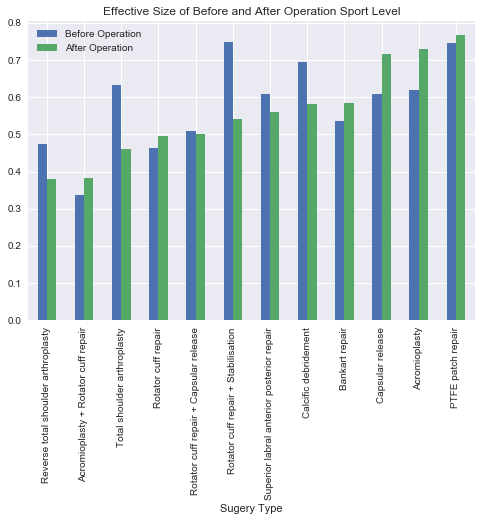

In [104]:
#plotting the cohen'd size of Sport Level, sorting by After Operation 
cd_data=cd_data.sort_values(by='After Operation')
cd_data.plot(x="Sugery Type", y=["Before Operation","After Operation"], kind="bar")
plt.title('Effective Size of Before and After Operation Sport Level')
plt.show()

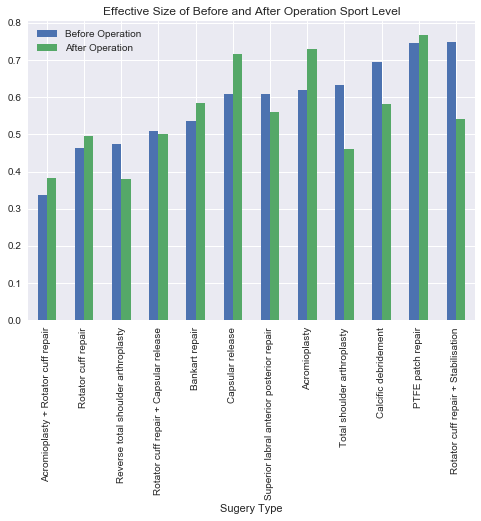

In [106]:
#plotting the cohen'd size of Sport Level, sorting by Before Operation 
cd_data=cd_data.sort_values(by='Before Operation')
cd_data.plot(x="Sugery Type", y=["Before Operation","After Operation"], kind="bar")
plt.title('Effective Size of Before and After Operation Sport Level')
plt.show()

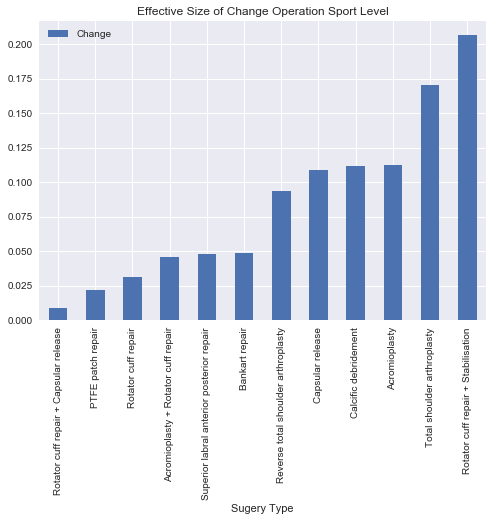

In [108]:
#plotting the cohen'd size of change
cd_data=cd_data.sort_values(by='Change')
cd_data.plot(x="Sugery Type", y=["Change"], kind="bar")
plt.title('Effective Size of Change Operation Sport Level')
plt.show()

### Plotting the before operation sport Level and after operation sport level

In [168]:
for index, row in origin_data.iterrows():
    if (row['Current Sport']==0):
        origin_data.loc[index,'Current Sport']='None'
    if (row['Current Sport']==1):
        origin_data.loc[index,'Current Sport']='Hobby'
    if (row['Current Sport']==2):
        origin_data.loc[index,'Current Sport']='Club'
    if (row['Current Sport']==3):
        origin_data.loc[index,'Current Sport']='National'
    if (row['Current Sport.1']==0):
        origin_data.loc[index,'Current Sport.1']='None'
    if (row['Current Sport.1']==1):
        origin_data.loc[index,'Current Sport.1']='Hobby'
    if (row['Current Sport.1']==2):
        origin_data.loc[index,'Current Sport.1']='Club'
    if (row['Current Sport.1']==3):
        origin_data.loc[index,'Current Sport.1']='National'
origin_surgery_group=dict()
for group in origin_data.groupby(data['Type']):
    (s, df) = group
    origin_surgery_group[s] = df
origin_surgery_types=list(surgery_group.keys())


### Before Operation

In [170]:
#Count the number of each sport level for each sugery type
count_data=pd.DataFrame()
for st in origin_surgery_types:
    count_result=origin_surgery_group.get(st)['Current Sport'].value_counts(sort=True)
    count_data=pd.concat([count_data, count_result], axis=1)
count_data.columns = origin_surgery_types     
#sort the column according to None, Hobby, Club, National in ascending order
count_data.sort_values(by=['None', 'Hobby', 'Club', 'National'], axis=1, inplace=True)
count_data.fillna(value=0, inplace=True)
count_data.to_csv('/Users/carolchen/Desktop/Plot_Data.csv') 
count_data

,Total shoulder arthroplasty,Hemiarthroplasty,Acromioplasty,Calcific debridement,Rotator cuff repair + Stabilisation,PTFE patch repair,Rotator cuff repair + Capsular release,Reverse total shoulder arthroplasty,Capsular release,Superior labral anterior posterior repair,Bankart repair,Acromioplasty + Rotator cuff repair,Rotator cuff repair
Club,2.0,0.0,3,1.0,6.0,5.0,2,3,6,7,6.0,5,46
Hobby,1.0,0.0,2,7.0,8.0,9.0,4,3,9,17,14.0,8,127
National,0.0,0.0,2,0.0,0.0,0.0,2,1,1,1,0.0,1,6
None,2.0,2.0,5,5.0,7.0,7.0,8,9,12,19,22.0,39,260


### After Operation

In [171]:
#Count the number of each sport level for each sugery type
count_data2=pd.DataFrame()
for st in origin_surgery_types:
    count_result2=origin_surgery_group.get(st)['Current Sport.1'].value_counts(sort=True)
    count_data2=pd.concat([count_data2, count_result2], axis=1)
count_data2.columns = origin_surgery_types     
#sort the column according to None, Hobby, Club, National in ascending order
count_data2.sort_values(by=['None', 'Hobby', 'Club', 'National'], axis=1, inplace=True)
count_data2.fillna(value=0, inplace=True)
count_data2.to_csv('/Users/carolchen/Desktop/Plot_Data2.csv') 
count_data2

,Hemiarthroplasty,Total shoulder arthroplasty,Acromioplasty,Calcific debridement,PTFE patch repair,Rotator cuff repair + Capsular release,Rotator cuff repair + Stabilisation,Capsular release,Reverse total shoulder arthroplasty,Bankart repair,Superior labral anterior posterior repair,Acromioplasty + Rotator cuff repair,Rotator cuff repair
Club,0.0,0.0,3.0,2.0,5,1.0,3,6.0,2.0,6.0,6.0,3.0,37
Hobby,0.0,2.0,5.0,5.0,9,6.0,7,12.0,3.0,16.0,16.0,13.0,151
National,0.0,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,0.0,8
None,2.0,3.0,4.0,6.0,6,9.0,10,10.0,11.0,20.0,22.0,37.0,243
